<h1>Patrick Barry - CS4618 Artificial Intelligence 1 Assignment</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [66]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

In [3]:
# read in the dataset
df = pd.read_csv("datasets/dataset_salaries.csv")

<h1>Data Cleaning</h1>

In [4]:
df.shape

(62642, 17)

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

In [6]:
df.describe(include="all")

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62637,62527,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,43102,40139,62642.000000,62640.000000,62642.000000
unique,62561,1869,3071,15,NaN,1050,NaN,NaN,3271,NaN,NaN,NaN,4,40132,NaN,NaN,NaN
top,2/25/2020 13:25:07,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,cyclieuns,NaN,NaN,NaN
freq,3,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,9856.201989,616.097222,41694.723732
std,NaN,NaN,NaN,NaN,3.877877e+04,NaN,6.437148,3.524030,NaN,1.927194e+04,2.520611e+04,3709.187697,NaN,NaN,6679.104563,289.843390,24488.865879
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,7369.000000,506.000000,20069.250000
50%,NaN,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,7839.000000,807.000000,42019.000000
75%,NaN,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,11521.000000,807.000000,63021.750000


<h1>Drop Some Features</h1>
<p>
    Right away, we can see some columns to delete.
</p>
<ul>
    <li>
        The timestamp column is when the user entered their details in the website and pressed submit. Not relevant to our target value.
    </li>
    <li>
        rowNumber refers to the row in the levels.fyi database, which is irrelevant for our purposes.
    </li>
</ul>
<p>
    So we can already remove these unnecessary columns.
</p>

In [7]:
df = df.drop(columns=["timestamp", "rowNumber"])

In [8]:
df['otherdetails'].unique()

array([nan, 'birm', 'syniirty typuirm mcuiehl', ...,
       'triasm froidy peusk juieck skaorr',
       'hypoiarly khoiarts krol sqierg',
       'fluingly toasly croesm fiuk gniosk khaiarts strucy'], dtype=object)

<h1>More Superfluous Features</h1>
<ul>
    <li>otherdetails - almost every value is unique and values are uninterpretable</li>
    <li>cityid - already have location information</li>
    <li>dmaid - each city in the US has a 3 digit numeric DMA code.</li>
    <ul><li>But as seen below, not all cities in our dataset are in the US</li></ul>
</ul>

In [9]:
df = df.drop(columns=["cityid", "otherdetails"])

In [10]:
df['dmaid'] = df['dmaid'].astype(str)

In [11]:
df['dmaid'].describe(include="all")

count     62642
unique      150
top       807.0
freq      20400
Name: dmaid, dtype: object

In [12]:
df['location'].unique()

array(['Redwood City, CA', 'San Francisco, CA', 'Seattle, WA', ...,
       'Taichung City, CN, China', 'Giza, JZ, Egypt',
       'Pasir Ris, SG, Singapore'], dtype=object)

In [13]:
df = df.drop(columns=["dmaid"])

<h1>Investigate other features</h1>
<ul>
    <li>
        totalyearlycompensation is calculated from an employee's base salary plus the value of any financial benefits.
        <ul>
            <li>Basically, totalyearly compensation = basesalary + bonus + stockgrantvalue</li>
            <li>Unuseable, as it contains base salary.</li>
        </ul>
    </li>
    <li>
        An employee's bonus is also often calculated from their base salary.
        <ul>
            <li>Sometimes an employee might get a signing bonus when they begin a job, a performance bonus, a referral bonus, etc.</li>
            <li>However we can't determine what type of bonus an employee received with our data.</li>
            <li>So we must remove it as a feature.</li>
        </ul>
    </li>
    <li>stockgrantvalue is not correlated to base salary directly, but it is not useful for prediction.</li>
        <ul><li>So we can also drop this.</li></ul>
    <li>Let's look at the dataset again.</li>
</ul>

In [14]:
df = df.drop(columns=["totalyearlycompensation", "bonus", "stockgrantvalue"])

In [15]:
df.describe(include='all')

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
count,62637,62527,62642,62642,62642.000000,62642.000000,61788,6.264200e+04,43102
unique,1869,3071,15,1050,NaN,NaN,3271,NaN,4
top,Amazon,L4,Software Engineer,"Seattle, WA",NaN,NaN,Full Stack,NaN,Male
freq,8054,5008,41231,8701,NaN,NaN,11382,NaN,35702
mean,NaN,NaN,NaN,NaN,7.191054,2.700616,NaN,1.798145e+03,NaN
std,NaN,NaN,NaN,NaN,6.437148,3.524030,NaN,1.927194e+04,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,8.800000e+01,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,1.310000e+02,NaN
75%,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.810000e+02,NaN


In [16]:
# level seems to contain many different values
# some perhaps repeated in different ways e.g. L5, 5
df['level'].unique()

array(['L3', 'SE 2', 'L7', ..., 'E03', 'Level', 'DS II'], dtype=object)

In [17]:
# most common are most likely L1, L2, ..., L7
# could write code to keep these entries and change all others to something like 'other'
# but this is unlikely to improve our model

In [18]:
# tag has a similar problem, with thousands of unique values as well

In [19]:
df.describe(include='all')

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
count,62637,62527,62642,62642,62642.000000,62642.000000,61788,6.264200e+04,43102
unique,1869,3071,15,1050,NaN,NaN,3271,NaN,4
top,Amazon,L4,Software Engineer,"Seattle, WA",NaN,NaN,Full Stack,NaN,Male
freq,8054,5008,41231,8701,NaN,NaN,11382,NaN,35702
mean,NaN,NaN,NaN,NaN,7.191054,2.700616,NaN,1.798145e+03,NaN
std,NaN,NaN,NaN,NaN,6.437148,3.524030,NaN,1.927194e+04,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,8.800000e+01,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,1.310000e+02,NaN
75%,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.810000e+02,NaN


In [20]:
features = ["company", "level", "title", "location",
           "yearsofexperience", "yearsatcompany", "tag", 
            "gender"]
numeric_features = ["yearsofexperience", "yearsatcompany"]
nominal_features = ["company", "level", "title", "location",
                   "tag", "gender"]

<h1>Search for Incorrect Data</h1>
<p>I have found errors in the gender column before so that's a good place to start.</p>

In [21]:
df["gender"].unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [22]:
# can correct the error value to the mode
gender_mode = df['gender'].mode()[0]
error_value = "Title: Senior Software Engineer" 
df['gender'] = df['gender'].replace(error_value, gender_mode)

In [23]:
len(df[df["basesalary"]==0])

2304

In [24]:
# As we can see, there are many entries with a base salary of 0.
# We can delete these as they are not useful to train the model.
df = df[df["basesalary"]>0].copy()

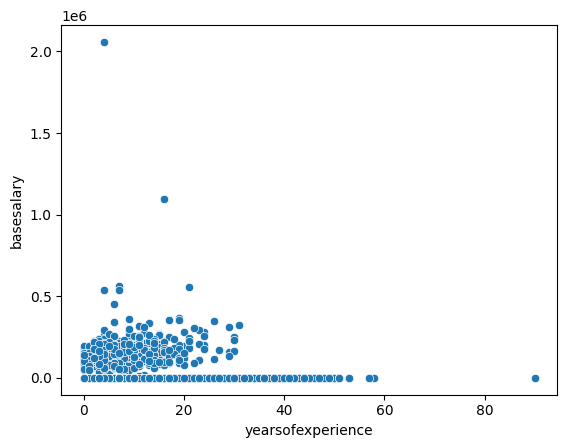

In [25]:
plot = scatterplot(x="yearsofexperience", y="basesalary", data=df)

In [26]:
# Salaries stored are divided by 1000.
# E.g. a salary of 100,000 would be stored as 100

In [27]:
# The minimum salary in Ireland is around 20,000, and in the US around 15,000
# We'll say salaries under 15 are likely to be earning less than minimum wage 
df[df['basesalary']<=15].count()[0]

434

In [28]:
# It could be that the employee is working part-time
# We will not use this data regardless
df = df[df['basesalary']>15].copy()

In [29]:
# Some people may indeed be earning more than 10 million a year
df[df['basesalary']>=10000].count()[0]

687

In [30]:
# Also possible that levels.fyi have updated their database storage methods
# but neglected these entries while updating
# But more likely a typo
df = df[df['basesalary']<10000].copy()

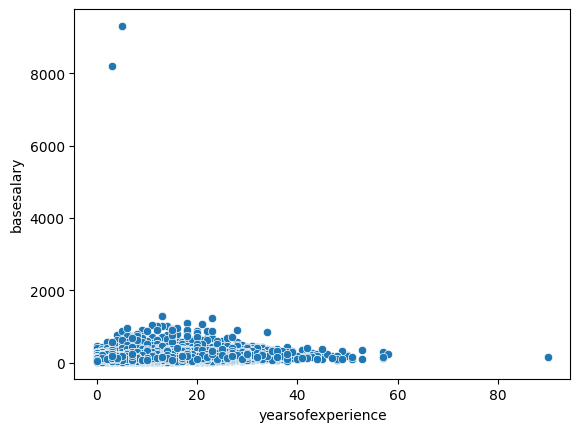

In [31]:
# Check for more outliers
plot = scatterplot(x="yearsofexperience", y="basesalary", data=df)

In [32]:
# 2 outliers earning more than 8 million a year
df = df[df['basesalary']<8000].copy()

In [33]:
# More than 60 years of experience seems unlikely, let's check it out
df[df['yearsofexperience']>60]

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
47788,Disney,5,Product Designer,"Crapo, MD",90,90,Interaction Design,139,NaN


In [34]:
# Likely a typo, we can remove it
df = df[df['yearsofexperience']<60].copy()

In [35]:
df[df['yearsofexperience']<df['yearsatcompany']].count()[0]

5457

In [36]:
# Might seem incorrect for years at company to be larger than years of experience.
# But I think years of experience could be interpreted as time in the current role.
# A software engineer manager could previously have been a software engineer
# and may consider these roles to be separate.
# So I will leave these values here

In [37]:
(df['basesalary']).describe()

count    59214.000000
mean       142.593171
std         70.795187
min         16.000000
25%         93.000000
50%        133.000000
75%        182.000000
max       1287.000000
Name: basesalary, dtype: float64

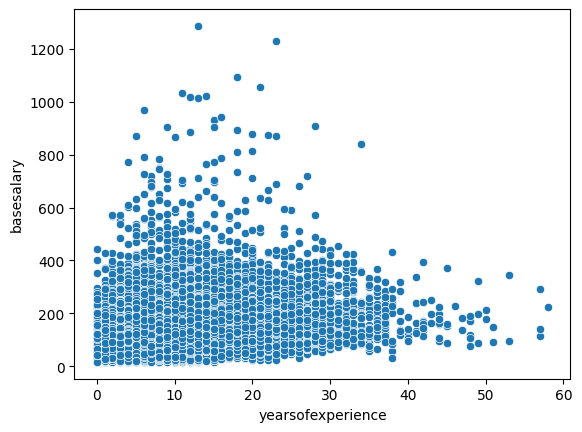

In [38]:
plot = scatterplot(x="yearsofexperience", y="basesalary", data=df)

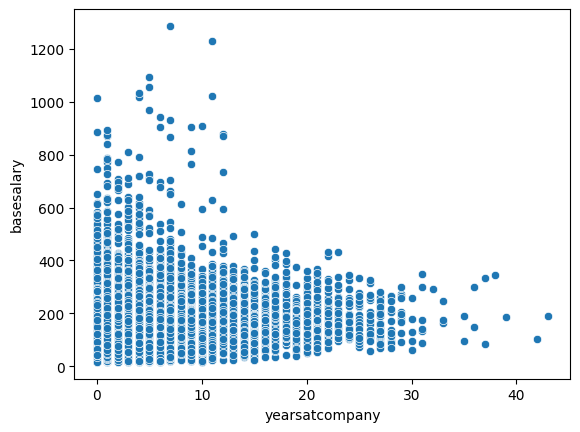

In [39]:
plot = scatterplot(x="yearsatcompany", y="basesalary", data=df)

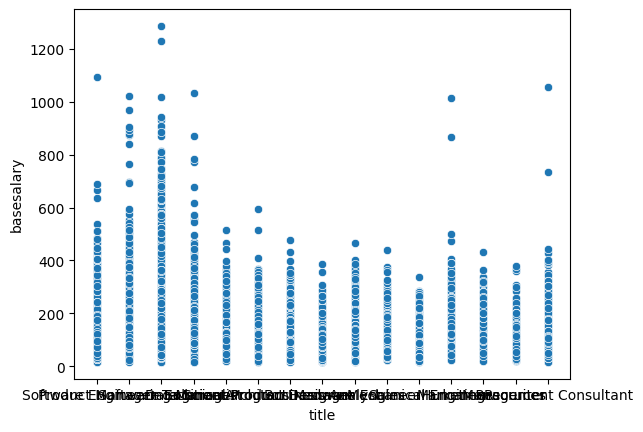

In [40]:
plot = scatterplot(x="title", y="basesalary", data=df)

In [41]:
# 2 potential outliers here?
df[(df['title']=="Management Consultant") & (df['basesalary'] > 500)]

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
45852,PwC,Partner / Principal,Management Consultant,"Raleigh, NC",21,5,"Cloud, IoT",1057,Male
58880,Deloitte,Partner,Management Consultant,"San Francisco, CA",18,12,Strategy,734,Male


In [42]:
# I think they are correct
# how about marketing?
df[(df['title']=="Marketing") & (df['basesalary'] > 500)]

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
31432,Netflix,Director,Marketing,"Hollywood, CA",13,0,Marketing,1013,NaN
32791,Netflix,Senior,Marketing,"Los Angeles, CA",10,1,Marketing,501,Other
59212,IBM,Band 9,Marketing,"Dubai, DU, United Arab Emirates",10,7,Marketing,868,NaN


In [43]:
df[(df['yearsatcompany']<1) & (df['yearsofexperience']<1)
                   & (df['basesalary']>150)].head()

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
136,Amazon,L4,Software Engineer,"Seattle, WA",0,0,NaN,158,NaN
167,Google,T3,Software Engineer,"Mountain View, CA",0,0,NaN,157,NaN
196,Microsoft,59,Software Engineer,"Redmond, WA",0,0,NaN,156,NaN
258,Mixpanel,L2 (new grad),Software Engineer,"San Francisco, CA",0,0,NaN,183,NaN
323,Apple,New Grad (ICT2),Software Engineer,"Sunnyvale, CA",0,0,NaN,167,NaN


In [44]:
# highly unlikely for a person who has never worked 
# in the field to be earning more than 150,000 starting salary
# so we will remove these entries
df.drop(df[(df['yearsatcompany']<1) & (df['yearsofexperience']<1)
                   & (df['basesalary']>150)].index, inplace=True)

In [45]:
df.describe(include='all')

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
count,58422,58320,58427,58427,58427.000000,58427.000000,57982,58427.000000,40773
unique,1827,2946,15,1021,NaN,NaN,3156,NaN,3
top,Amazon,L4,Software Engineer,"Seattle, WA",NaN,NaN,Full Stack,NaN,Male
freq,7284,4668,38128,7924,NaN,NaN,10589,NaN,33755
mean,NaN,NaN,NaN,NaN,7.304106,2.719770,NaN,142.153046,NaN
std,NaN,NaN,NaN,NaN,6.423347,3.515824,NaN,71.106206,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,16.000000,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,93.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,132.000000,NaN
75%,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,182.000000,NaN


In [46]:
for feature in nominal_features:
    print(feature, df[feature].unique())

company ['Oracle' 'Amazon' 'Apple' ... 'Tsmc' 'Pegatron' 'Johnson']
level ['L3' 'L7' 'M1' ... 'E03' 'Level' 'DS II']
title ['Product Manager' 'Software Engineering Manager' 'Software Engineer'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Product Designer' 'Business Analyst' 'Hardware Engineer' 'Sales'
 'Mechanical Engineer' 'Marketing' 'Human Resources' 'Recruiter'
 'Management Consultant']
location ['Redwood City, CA' 'Seattle, WA' 'Sunnyvale, CA' ...
 'Richmond, BC, Canada' 'Taichung City, CN, China'
 'Pasir Ris, SG, Singapore']
tag [nan 'Full Stack' 'Distributed Systems (Back-End)' ...
 'Marketing Technology' 'Program Manager II' 'Product Infra']
gender [nan 'Male' 'Female' 'Other']


In [47]:
df.reset_index(drop=True, inplace=True)

<h1>Create Test Set</h1>

In [48]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h1>Dataset Exploration</h1>

In [49]:
copy_df = dev_df.copy()

In [50]:
copy_df.corr()

/var/folders/_9/4sprgpf55g9fqk73fyc2s_0w0000gn/T/ipykernel_4184/1653301174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,yearsofexperience,yearsatcompany,basesalary
yearsofexperience,1.000000,0.428790,0.308457
yearsatcompany,0.428790,1.000000,0.139139
basesalary,0.308457,0.139139,1.000000


In [51]:
copy_df.describe(include='all')

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
count,46737,46650,46741,46741,46741.000000,46741.000000,46393,46741.000000,32663
unique,1723,2564,15,936,NaN,NaN,2664,NaN,3
top,Amazon,L4,Software Engineer,"Seattle, WA",NaN,NaN,Full Stack,NaN,Male
freq,5845,3765,30529,6297,NaN,NaN,8461,NaN,27052
mean,NaN,NaN,NaN,NaN,7.309022,2.722064,NaN,142.218908,NaN
std,NaN,NaN,NaN,NaN,6.432914,3.512416,NaN,71.557673,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,16.000000,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,93.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,132.000000,NaN
75%,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,182.000000,NaN


In [52]:
# yearsofexperience is the most correlated value with basesalary
# so I will try squaring it and dividing by yearsatcompany
copy_df["yearsxxc"] = (copy_df["yearsofexperience"]*copy_df["yearsofexperience"])/copy_df["yearsatcompany"]

In [53]:
copy_df.corr()

/var/folders/_9/4sprgpf55g9fqk73fyc2s_0w0000gn/T/ipykernel_4184/1653301174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,yearsofexperience,yearsatcompany,basesalary,yearsxxc
yearsofexperience,1.000000,0.428790,0.308457,0.635705
yearsatcompany,0.428790,1.000000,0.139139,-0.150053
basesalary,0.308457,0.139139,1.000000,0.156521
yearsxxc,0.635705,-0.150053,0.156521,1.000000


<h1>Dataset Preparation</h1>
<p>Define a MetaTransformer class to find the best scaling function for our data.</p>

In [54]:
class InsertYearsXXC(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["yearsxxc"] = (X["yearsofexperience"]*X["yearsofexperience"])/X["yearsatcompany"]
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [55]:
class MetaTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

In [56]:
# Scale the features and impute any missing nominal values
# This is not ideal considering there is a lot of missing gender values
# Ideally we would know each value
# But we will fill in all the unknown values with the mode, "Male"
preprocessor = ColumnTransformer([
        ("num", Pipeline([("scaler", MetaTransformer())]),
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [57]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, converted to a 1D numpy array
dev_y = dev_df["basesalary"].values
test_y = test_df["basesalary"].values

In [58]:
# As the dataset is sufficiently large, create a validation set
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

<h1>Learn some models</h1>

In [59]:
# Create a pipeline that combines the preprocessor with linear regression
linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())])

# Create a dictionary of hyperparameters for linear regression - just the scaling methods
linear_param_grid = {"preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Create the grid search object which will find the best hyperparameter values based on validation error
linear_gs = GridSearchCV(linear_model, linear_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
linear_gs.fit(dev_X, dev_y)

# Let's see how well we did
linear_gs.best_params_, linear_gs.best_score_

({'preprocessor__num__scaler__transformer': StandardScaler()},
 -42.000323197698414)

In [60]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [8,9,10],
                 "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 10,
  'preprocessor__num__scaler__transformer': MinMaxScaler()},
 -44.528914940955)

<h1>Underfitting or Overfitting?</h1>

In [61]:
scores = cross_validate(linear_model, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  33.43901359649886
Validation error:  41.98779086615828


<p>Linear regression is clearly overfitting.</p>
<p>From lecture 11, solutions to this include</p>
<ul>
    <li>gather more training examples;</li>
    <li>remove noise in the training examples;</li>
    <li>change model: move to a less complex model;</li>
    <li>simplify by reducing the number of features;</li>
    <li>stick with your existing model but add constraints (if you can) 
        to reduce its complexity.
    </li>
</ul>
<p>Have already applied some of these solutions above, and more are impossible.</p>
<p>So we will add constraints to our model and use ridge regression.</p>

In [62]:
# Create a pipeline that combines the preprocessor with ridge regression
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

# Create a dictionary of hyperparameters for ridge regression
ridge_param_grid = {"predictor__alpha": [0, 4.0, 5.0, 6.0],
                   "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]
                   }

# Create the grid search object which will find the best hyperparameter values based on validation error
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
ridge_gs.fit(dev_X, dev_y)

# Let's see how well we did
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 5.0,
  'preprocessor__num__scaler__transformer': MinMaxScaler()},
 -40.2465638426847)

In [63]:
ridge.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridge, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  37.61084259607159
Validation error:  40.2465638426847


<p>Overfitting problem is much improved!</p>

In [64]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  40.03788617886178
Validation error:  44.528914940955


<p>knn also seems to be overfitting but is less successful in it's prediction.</p>

<h1>Final Test-ination</h1>
<p>Ridge regression gave the lowest MAE with least 
    overfitting/underfitting so that is my chosen model</p>

In [65]:
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge(alpha=15.0))])

ridge_model.fit(dev_X, dev_y)

# Error estimation on test set
mean_absolute_error(test_y, ridge_model.predict(test_X))

40.1524439782378